In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in file

fname= "repd-january-2023.xlsx" 
repd = pd.read_excel(fname, sheet_name = 'REPD')
repd.head()


,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref,long,lat
0,N00053B,1,2009-07-07,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,2004-09-03,NaT,NaT,NaT,NaT,2006-05-01,2007-05-01,NaN,0.503096,NaN
1,AA110,2,2017-11-20,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,1.247538,NaN
2,B0730,3,2020-06-04,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,2015-10-28,NaT,NaT,NaT,2020-10-28,2016-09-01,2019-12-20,NaN,0.759256,NaN
3,1106000,4,2003-12-18,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,1995-05-05,NaT,NaT,NaT,NaT,NaT,1998-10-02,NaN,0.455758,NaN
4,2047000,5,2005-09-29,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.8,No,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,0.499008,NaN


## Initial review of data

In [3]:
repd.shape

(8487, 53)

In [4]:
repd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8487 entries, 0 to 8486
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Old Ref ID                               3919 non-null   object        
 1   Ref ID                                   8487 non-null   int64         
 2   Record Last Updated (dd/mm/yyyy)         8487 non-null   datetime64[ns]
 3   Operator (or Applicant)                  8408 non-null   object        
 4   Site Name                                8484 non-null   object        
 5   Technology Type                          8487 non-null   object        
 6   Storage Type                             1013 non-null   object        
 7   Storage Co-location REPD Ref ID          637 non-null    object        
 8   Installed Capacity (MWelec)              7937 non-null   float64       
 9   CHP Enabled                              

In [5]:
repd.value_counts('Operator (or Applicant)').head(30)

Operator (or Applicant)
Private Developer                     305
Lightsource Renewable Energy          176
Scottish and Southern Energy (SSE)     82
Renewable Energy Systems (RES)         79
Scottish Power Renewables              55
Anesco                                 53
Waste Recycling Group                  52
Ecotricity                             49
WM Morrisons Supermarkets Plc          45
RWE npower                             39
British Solar Renewables               38
EDF Energy Renewables                  35
Biffa                                  34
Lark Energy                            34
Green Cat Renewables                   31
Airvolution Energy                     30
E.ON UK                                30
TGC Renewables                         30
Push Energy                            29
Npower Renewables                      29
Hive Energy                            28
Banks Renewables                       28
SITA UK                                27
Viridor   

In [6]:
#remove private developer from file as not required

repd = repd [repd['Operator (or Applicant)'] != 'Private Developer']
repd.shape

(8182, 53)

In [7]:
repd.value_counts('Development Status (short)') 

Development Status (short)
Operational                    2761
Awaiting Construction          1663
Application Submitted           949
Application Refused             927
Application Withdrawn           477
Revised                         459
Abandoned                       358
Planning Permission Expired     269
Under Construction              232
Appeal Withdrawn                 46
Decommissioned                   31
No Application Required           6
Appeal Lodged                     4
dtype: int64

In [8]:
# only include installations that are operational, under construction or awaiting construction
repd = repd[
                (repd['Development Status (short)'] == 'Operational' )| 
                (repd['Development Status (short)'] == 'Awaiting Construction' )| 
                (repd['Development Status (short)'] == 'Under Construction' ) 
               ]

In [9]:
#remove installations where the capacity is unknown

repd.dropna(subset=['Installed Capacity (MWelec)'], inplace = True)

In [10]:
repd.shape

(4386, 53)

In [11]:
# select subset of data required for reviewing capacity

useage = repd[['Technology Type', 'Installed Capacity (MWelec)', 'CfD Capacity (MW)', 'Development Status (short)' ]]
useage

,Technology Type,Installed Capacity (MWelec),CfD Capacity (MW),Development Status (short)
0,Biomass (co-firing),35.000,NaN,Operational
2,EfW Incineration,70.000,NaN,Operational
3,Biomass (dedicated),38.500,NaN,Operational
13,Biomass (dedicated),18.000,NaN,Operational
16,Biomass (dedicated),1.500,NaN,Operational
...,...,...,...,...
8353,Solar Photovoltaics,50.000,NaN,Awaiting Construction
8354,Battery,20.000,NaN,Awaiting Construction
8376,Hydrogen,0.900,NaN,Under Construction
8384,Solar Photovoltaics,0.225,NaN,Awaiting Construction


In [12]:
useage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 8398
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Technology Type              4386 non-null   object 
 1   Installed Capacity (MWelec)  4386 non-null   float64
 2   CfD Capacity (MW)            125 non-null    float64
 3   Development Status (short)   4386 non-null   object 
dtypes: float64(2), object(2)
memory usage: 171.3+ KB


## Initial plots 

Inital EDA to see what different technonlgy types exist and what their capacities are.


In [13]:
#overview of each technology type with min, max, mean mode.  Count included so we can see total number of installations within each type.

type_range= repd.groupby('Technology Type').agg({'Installed Capacity (MWelec)':["min", "max","mean","median","count"]})
type_range

Installed Capacity (MWelec)          \
                                                         min     max   
Technology Type                                                        
Advanced Conversion Technologies                       1.100    48.0   
Anaerobic Digestion                                    0.200    19.0   
Battery                                                0.100   400.0   
Biomass (co-firing)                                   18.000   645.0   
Biomass (dedicated)                                    0.156   645.0   
Compressed Air Energy Storage                          5.000     5.0   
EfW Incineration                                       1.200   100.0   
Flywheels                                            400.000   400.0   
Hot Dry Rocks (HDR)                                    3.000     7.0   
Hydrogen                                               0.800    10.0   
Landfill Gas                                           1.000    22.5   
Large Hydro                                            5.000   100.0   
Liquid Air Energy Storage                              5.000    49.9   
Pumped Storage Hydroelectricity                       99.900  1728.0   
Sewage Sludge Digestion                                1.100     9.7   
Shoreline Wave                                         1.000    23.0   
Small Hydro                                            0.185     4.5   
Solar Photovoltaics                                    0.150   350.0   
Tidal Barrage and Tidal Stream                         0.500   240.0   
Wind Offshore                                          7.000  2400.0   
Wind Onshore                                           0.150   443.0   

                                                            
                                        mean  median count  
Technology Type                                             
Advanced Conversion Technologies   13.760526   10.10    38  
Anaerobic Digestion                 2.407622    1.95   164  
Battery                            38.977273   25.00   341  
Biomass (co-firing)               232.666667   35.00     3  
Biomass (dedicated)                37.147925    6.65   106  
Compressed Air Energy Storage       5.000000    5.00     1  
EfW Incineration                   26.807000   20.55   100  
Flywheels                         400.000000  400.00     1  
Hot Dry Rocks (HDR)                 5.000000    5.00     2  
Hydrogen                            4.250000    3.40     8  
Landfill Gas                        2.940511    2.00   274  
Large Hydro                        20.460870   15.00    23  
Liquid Air Energy Storage          27.450000   27.45     2  
Pumped Storage Hydroelectricity   659.737500  420.00     8  
Sewage Sludge Digestion             4.183333    4.75    12  
Shoreline Wave                     12.000000   12.00     2  
Small Hydro                         1.769850    1.90   100  
Solar Photovoltaics                 7.998507    4.60  2203  
Tidal Barrage and Tidal Stream     41.988889    6.00     9  
Wind Offshore                     481.986154  286.50    65  
Wind Onshore                       21.708810   10.00   924

Looking at the median installed capacity (so that any individual large or small installations don't skew the values), Flywheels (400MW), Pumped Storage Hydroelectricity(420MW) and Wind Offshore(286.5MW) have the largest capacities however there is only one flywheel installation and 8 pumped storage hydroelectric.  However offshore wind has 65 installations ranging from 7MW to 2400MW capacities.  Solar has the largest number of installations (2203) with an installed capacity range of 0.150MW - 350MW, with a median of 4.60MW.

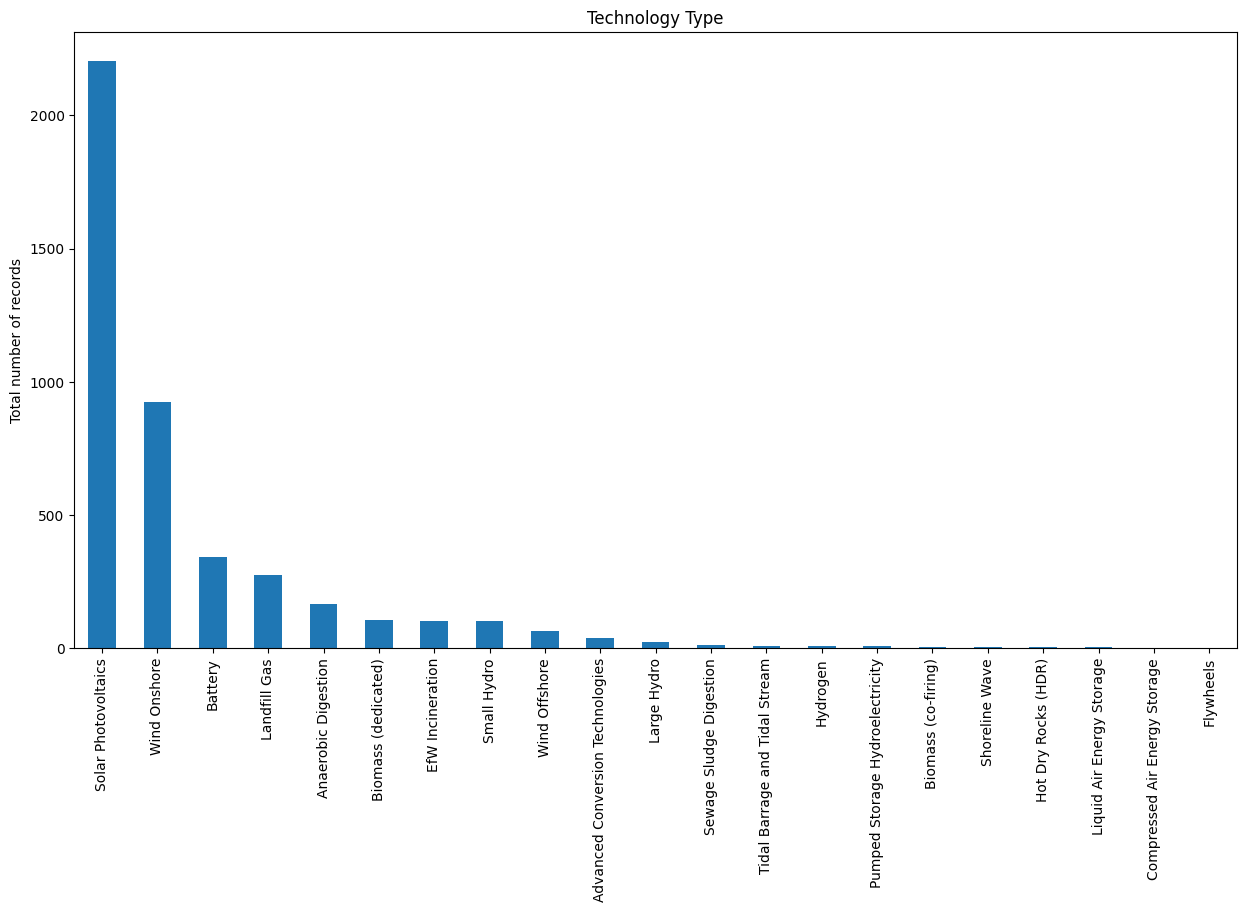

In [14]:
# counts for each installation type

types = useage.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type')
plt.xticks(rotation = 90)
plt.ylabel('Total number of records')
plt.xlabel('')
plt.show()


In [15]:
# plot the total capacities for each technology type

type_grouped = useage.groupby(['Technology Type'])['Installed Capacity (MWelec)'].sum().sort_values(ascending=False)
type_grouped 

Technology Type
Wind Offshore                       31329.10000
Wind Onshore                        20058.94030
Solar Photovoltaics                 17620.71151
Battery                             13291.25000
Pumped Storage Hydroelectricity      5277.90000
Biomass (dedicated)                  3937.68000
EfW Incineration                     2680.70000
Landfill Gas                          805.70000
Biomass (co-firing)                   698.00000
Advanced Conversion Technologies      522.90000
Large Hydro                           470.60000
Flywheels                             400.00000
Anaerobic Digestion                   394.85000
Tidal Barrage and Tidal Stream        377.90000
Small Hydro                           176.98500
Liquid Air Energy Storage              54.90000
Sewage Sludge Digestion                50.20000
Hydrogen                               34.00000
Shoreline Wave                         24.00000
Hot Dry Rocks (HDR)                    10.00000
Compressed Air Energy St

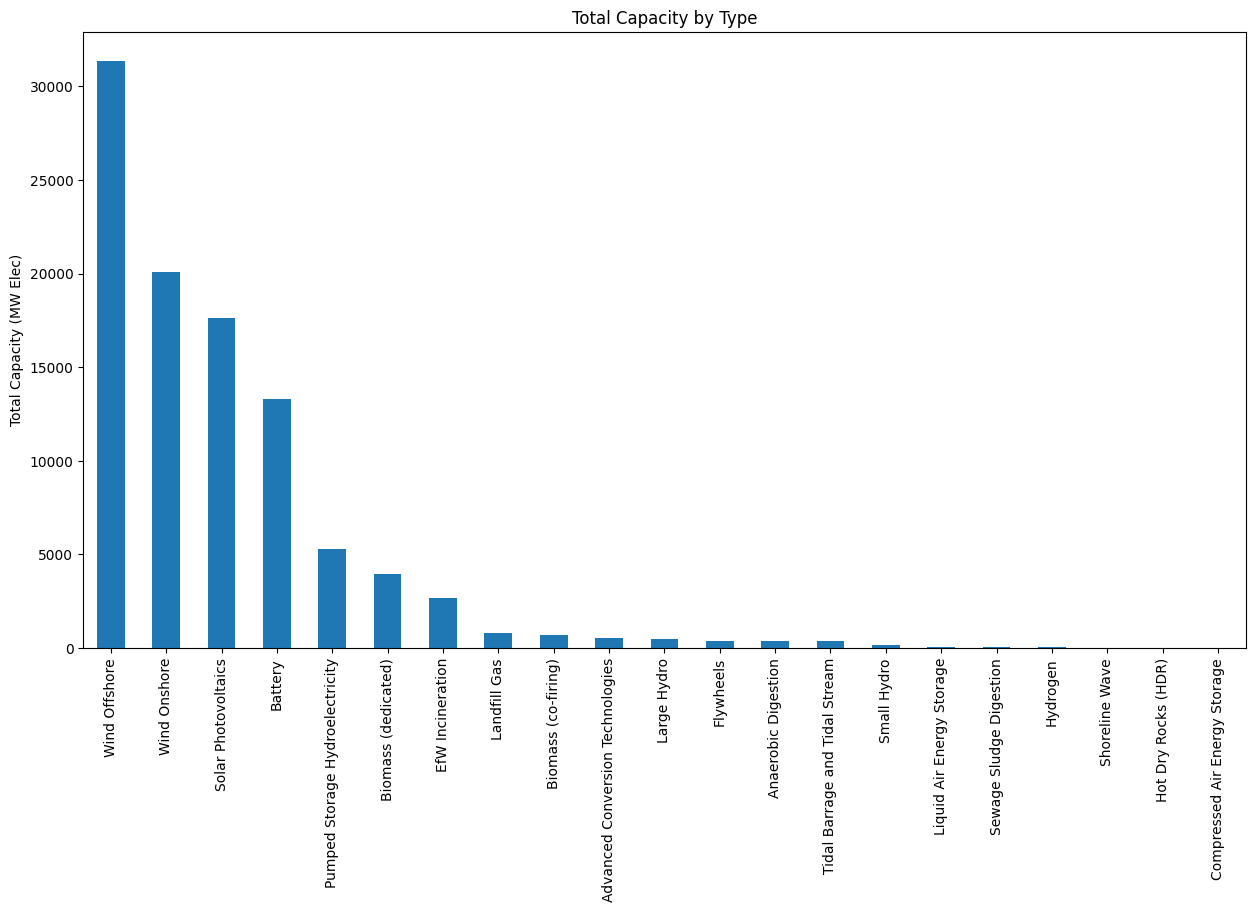

In [16]:
type_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Total Capacity by Type')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Total Capacity (MW Elec)')

plt.show()

In [17]:
# plot the median capacities for each technology type

type_median = useage.groupby('Technology Type')['Installed Capacity (MWelec)'].median().sort_values(ascending=False)
type_median


Technology Type
Pumped Storage Hydroelectricity     420.00
Flywheels                           400.00
Wind Offshore                       286.50
Biomass (co-firing)                  35.00
Liquid Air Energy Storage            27.45
Battery                              25.00
EfW Incineration                     20.55
Large Hydro                          15.00
Shoreline Wave                       12.00
Advanced Conversion Technologies     10.10
Wind Onshore                         10.00
Biomass (dedicated)                   6.65
Tidal Barrage and Tidal Stream        6.00
Hot Dry Rocks (HDR)                   5.00
Compressed Air Energy Storage         5.00
Sewage Sludge Digestion               4.75
Solar Photovoltaics                   4.60
Hydrogen                              3.40
Landfill Gas                          2.00
Anaerobic Digestion                   1.95
Small Hydro                           1.90
Name: Installed Capacity (MWelec), dtype: float64

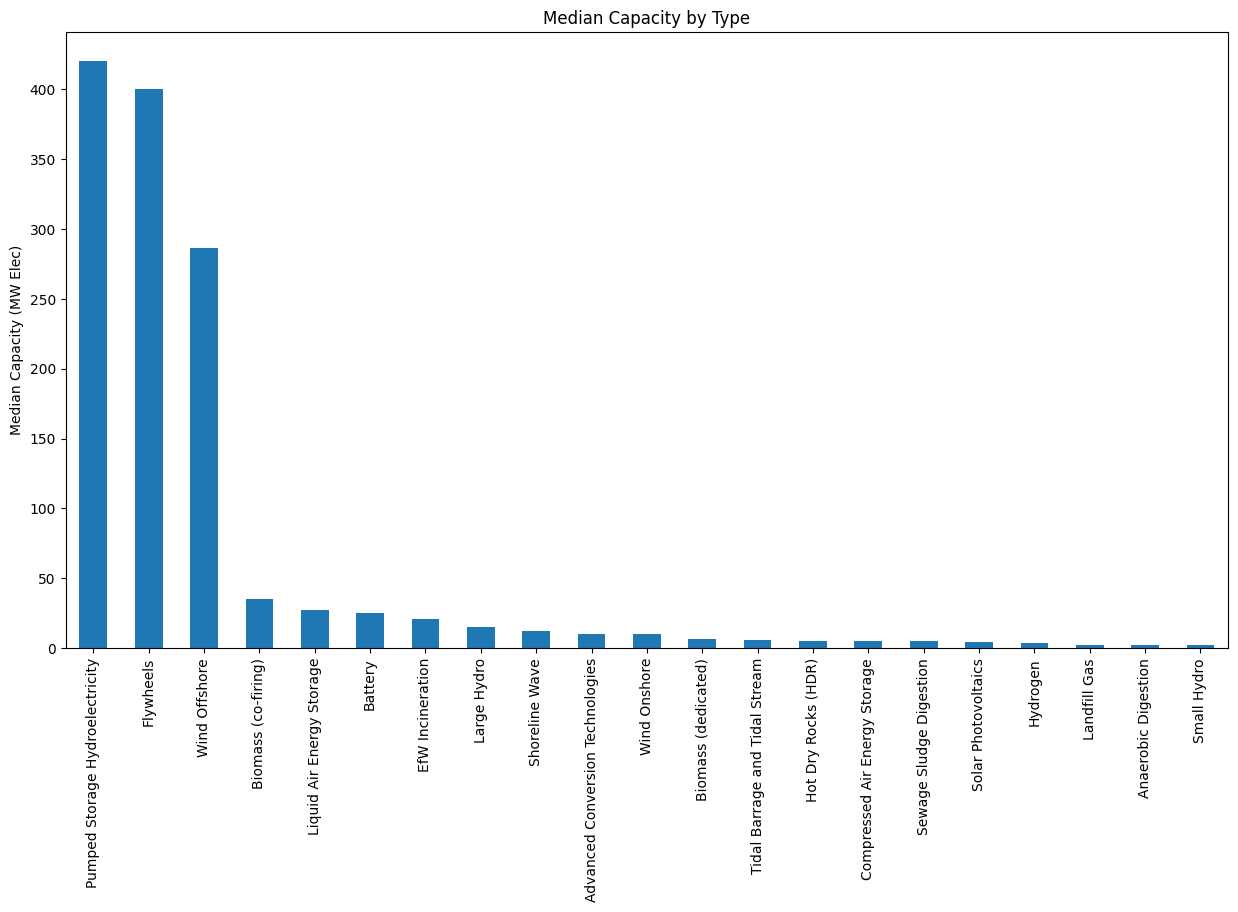

In [18]:
type_median.plot(kind = 'bar', figsize=(15,8))

plt.title('Median Capacity by Type')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Median Capacity (MW Elec)')

plt.show()

looking at same stats for operational sites only.

In [19]:
operational = useage.loc[useage['Development Status (short)'] == 'Operational']
operational

,Technology Type,Installed Capacity (MWelec),CfD Capacity (MW),Development Status (short)
0,Biomass (co-firing),35.000,NaN,Operational
2,EfW Incineration,70.000,NaN,Operational
3,Biomass (dedicated),38.500,NaN,Operational
13,Biomass (dedicated),18.000,NaN,Operational
16,Biomass (dedicated),1.500,NaN,Operational
...,...,...,...,...
7506,Anaerobic Digestion,1.000,NaN,Operational
7519,Wind Onshore,1.000,NaN,Operational
8071,Battery,20.000,NaN,Operational
8095,Solar Photovoltaics,0.299,NaN,Operational


In [20]:
operational.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737 entries, 0 to 8334
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Technology Type              2737 non-null   object 
 1   Installed Capacity (MWelec)  2737 non-null   float64
 2   CfD Capacity (MW)            32 non-null     float64
 3   Development Status (short)   2737 non-null   object 
dtypes: float64(2), object(2)
memory usage: 106.9+ KB


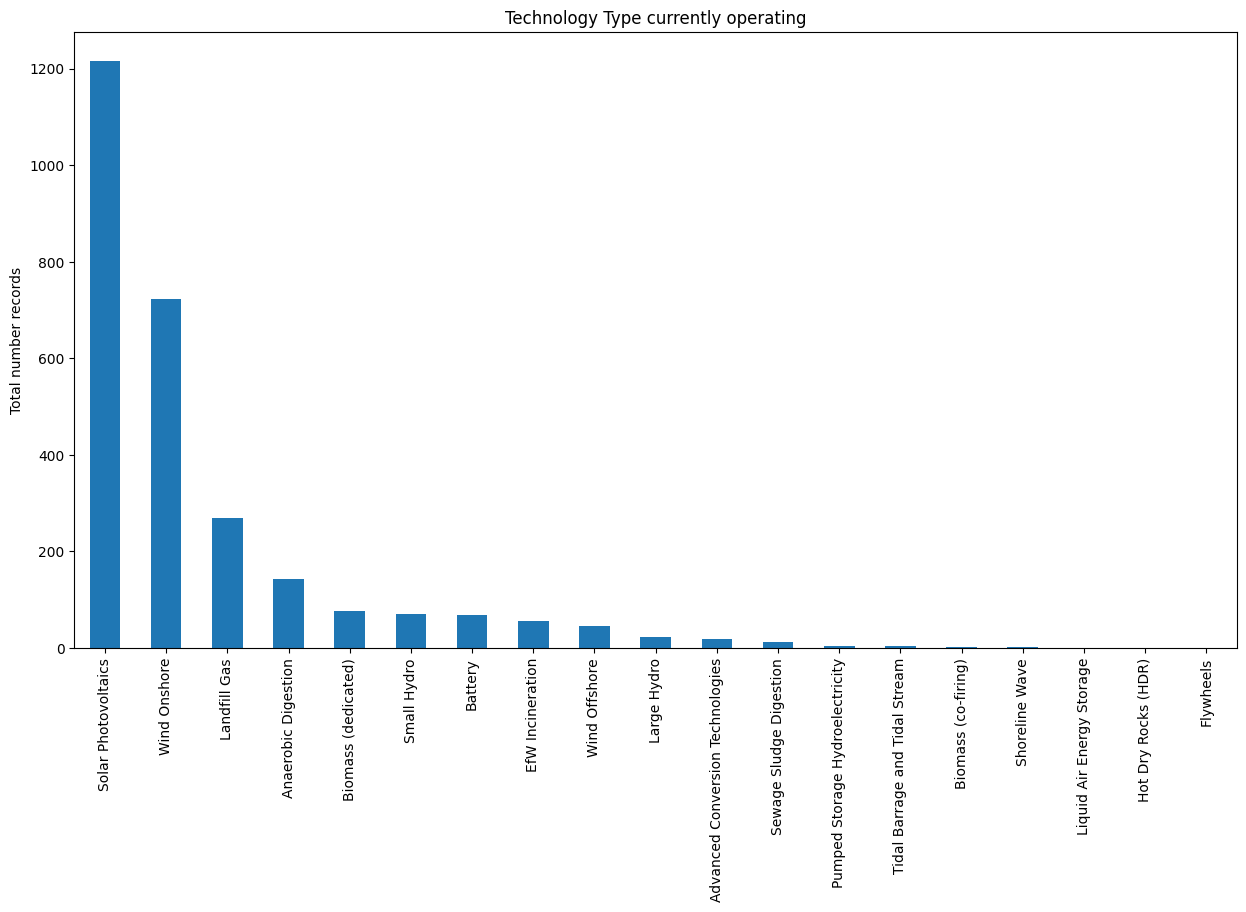

In [21]:
op_types = operational.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type currently operating')
plt.xticks(rotation = 90)
plt.ylabel('Total number records')
plt.xlabel('')
plt.show()

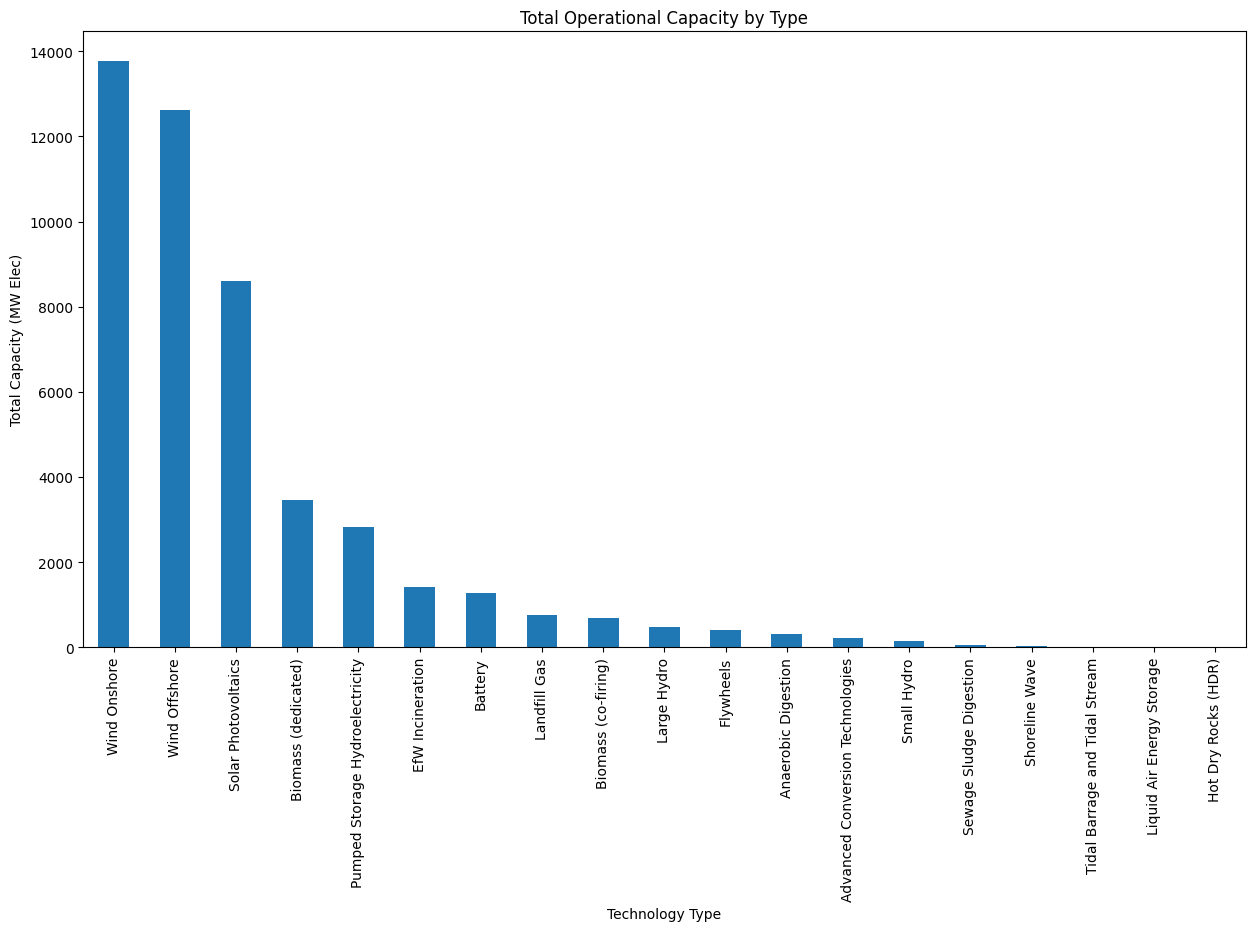

In [22]:
op_grouped = operational.groupby('Technology Type')['Installed Capacity (MWelec)'].sum().sort_values(ascending=False)

op_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Total Operational Capacity by Type')
plt.xticks(rotation = 90)
plt.ylabel('Total Capacity (MW Elec)')

plt.show()

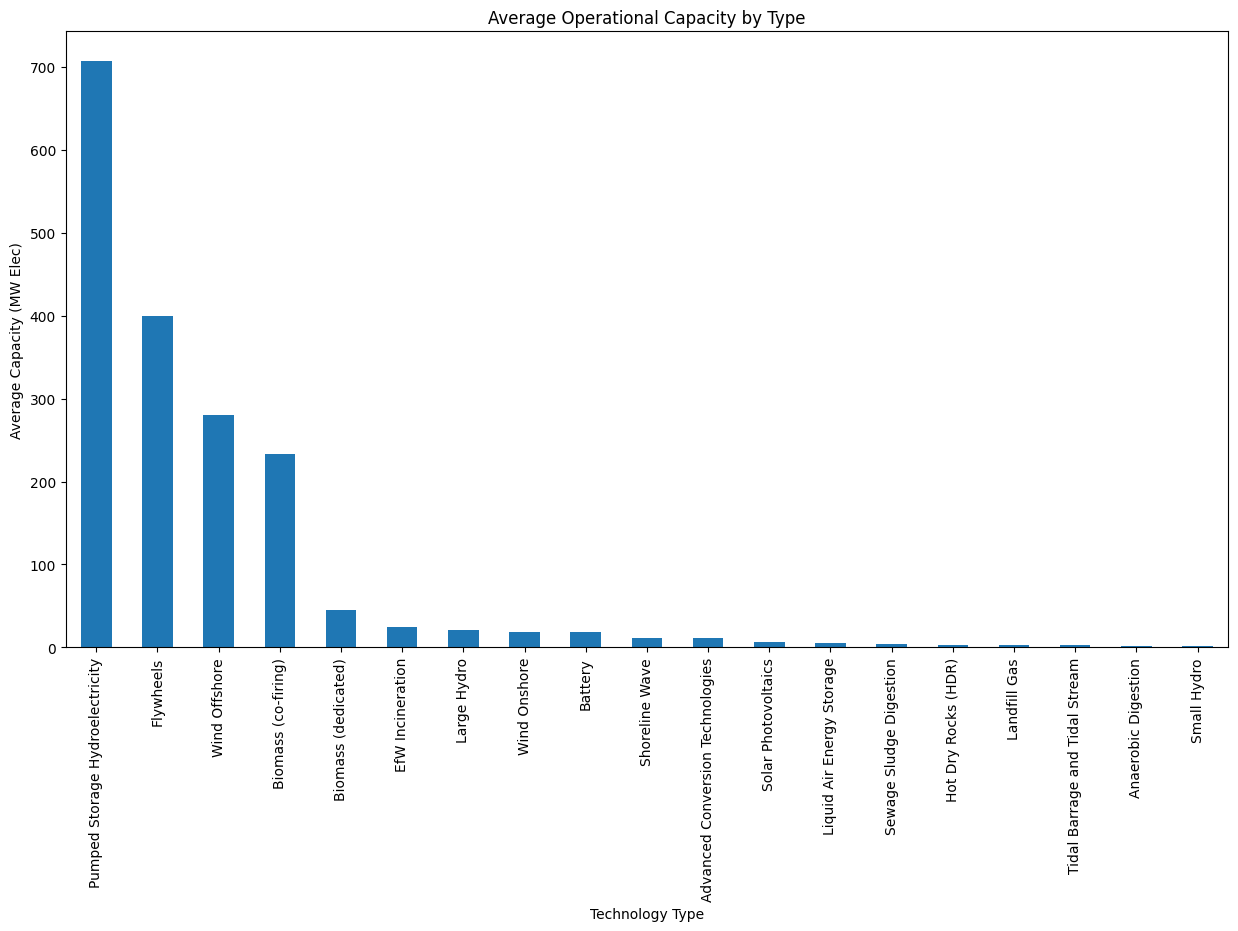

In [23]:
op_grouped = operational.groupby('Technology Type')['Installed Capacity (MWelec)'].mean().sort_values(ascending=False)

op_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Average Operational Capacity by Type')
plt.xticks(rotation = 90)
plt.ylabel('Average Capacity (MW Elec)')

plt.show()

## Review installed capacity for solar and wind further
From inital review of the datasource there appeared to be a large number of developments with low installed capacities. Checking this further to see range of installed capacities for solar and onshore wind.

In [24]:
# subset data for solar only and the installed capacity

solar =  repd[['Technology Type', 'Installed Capacity (MWelec)']]
solar = solar [(solar['Technology Type'] == 'Solar Photovoltaics' )]

In [25]:
solar.describe()

,Installed Capacity (MWelec)
count,2203.000000
mean,7.998507
std,14.204742
min,0.150000
25%,0.616650
50%,4.600000
75%,8.000000
max,350.000000


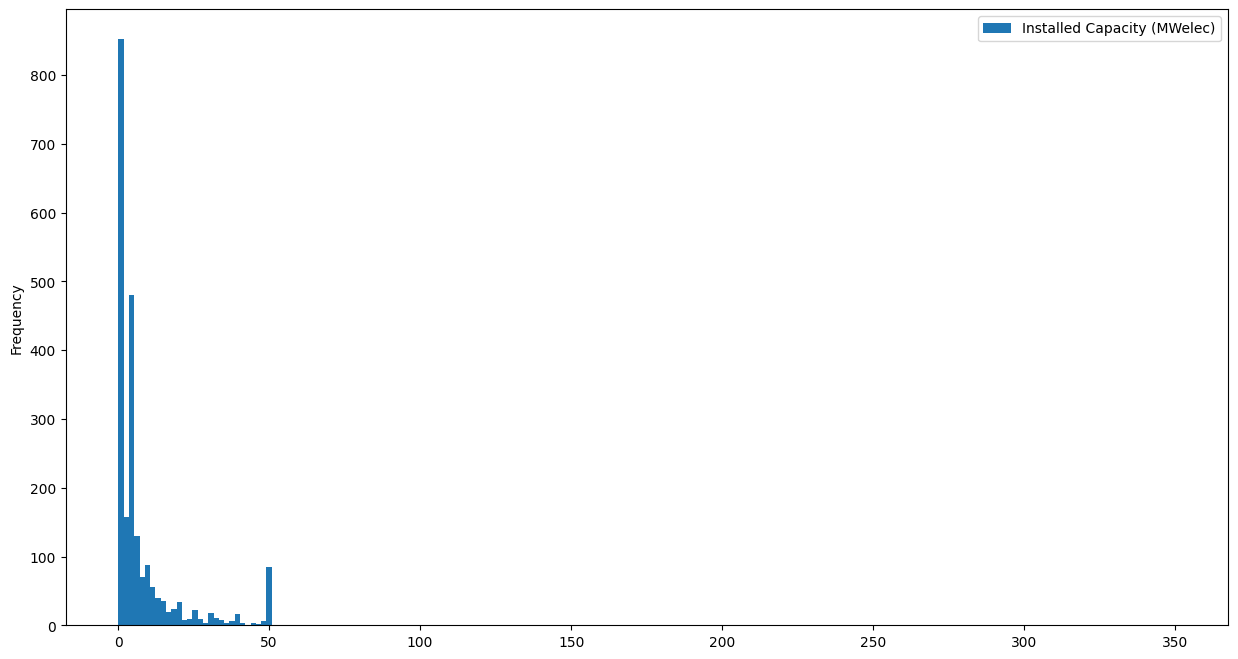

In [26]:
solar.plot(kind = 'hist', bins =200, figsize=(15,8))
plt.show()

## high number of installations at low capacity

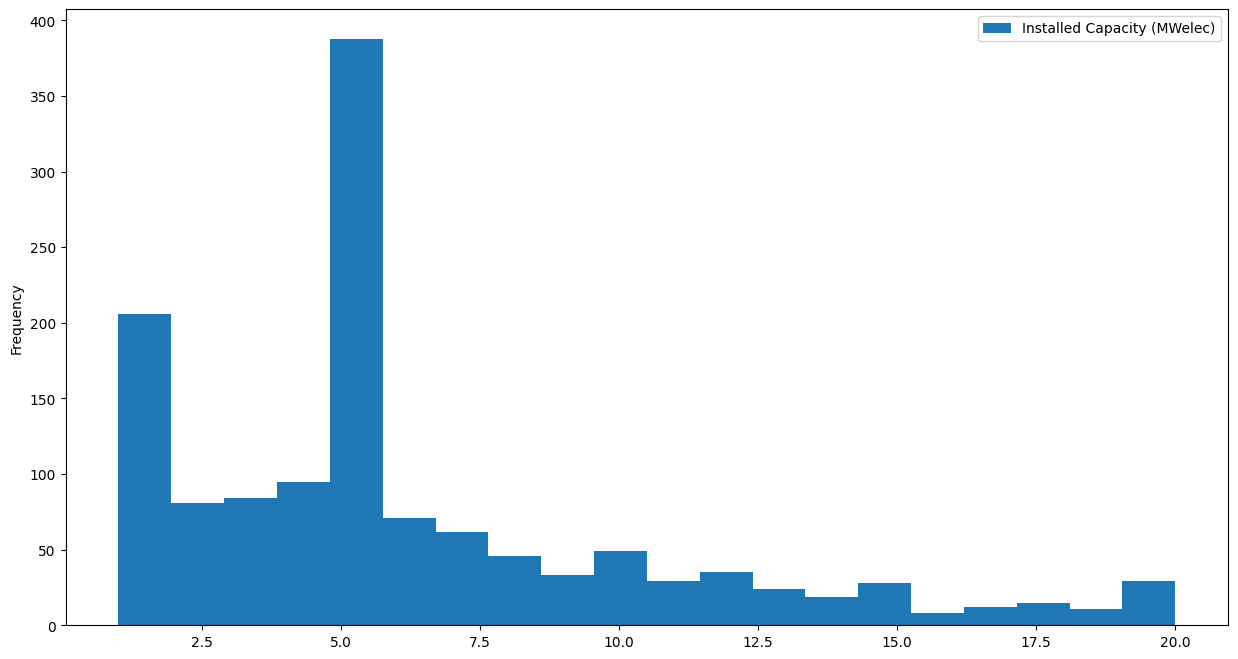

In [27]:
#narrow the range to lower bins only
solar.plot(kind = 'hist', range=[1, 20], bins =20, figsize=(15,8))
plt.show()

In [28]:
# subset the data for onshore wind and number of turbines

os_wind =  repd[['Technology Type', 'Installed Capacity (MWelec)']]
os_wind = os_wind [(os_wind['Technology Type'] == 'Wind Onshore' )]

In [29]:
os_wind



,Technology Type,Installed Capacity (MWelec)
2048,Wind Onshore,177.00
2049,Wind Onshore,88.40
2051,Wind Onshore,96.00
2057,Wind Onshore,51.00
2065,Wind Onshore,37.60
...,...,...
7649,Wind Onshore,0.25
7751,Wind Onshore,1.00
7767,Wind Onshore,0.25
7857,Wind Onshore,28.00


In [30]:
os_wind.describe()

,Installed Capacity (MWelec)
count,924.000000
mean,21.708810
std,36.618632
min,0.150000
25%,4.000000
50%,10.000000
75%,25.000000
max,443.000000


<AxesSubplot: ylabel='Frequency'>

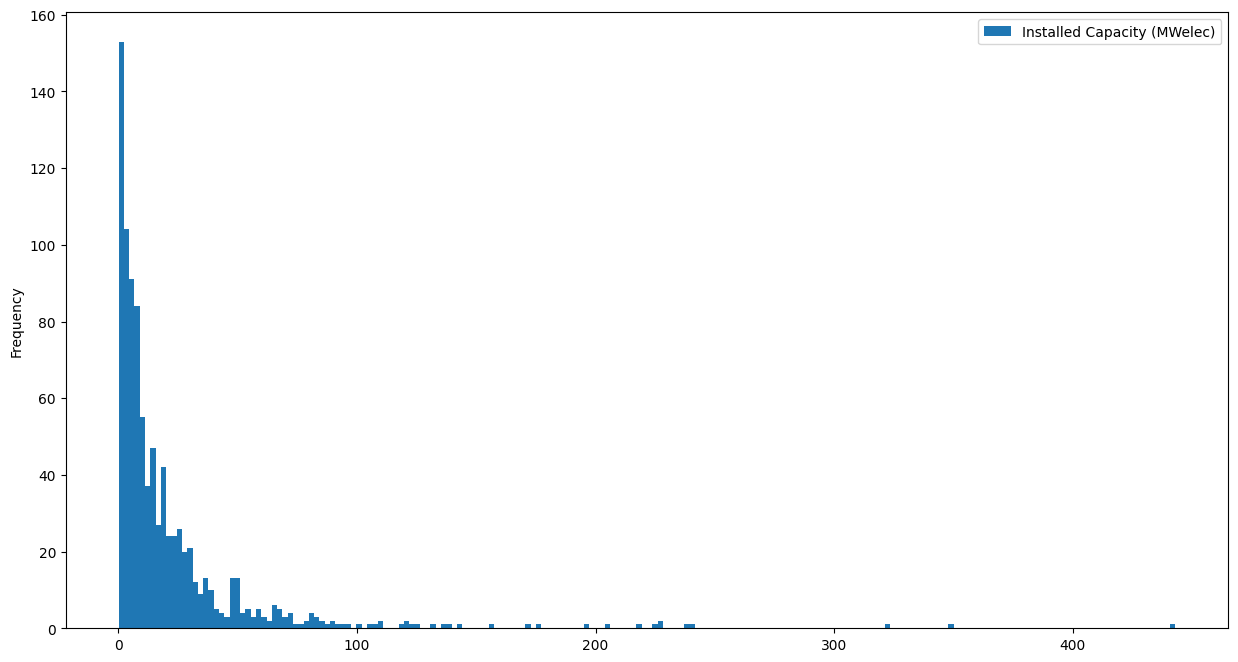

In [31]:
os_wind.plot(kind = 'hist', bins =200, figsize=(15,8))



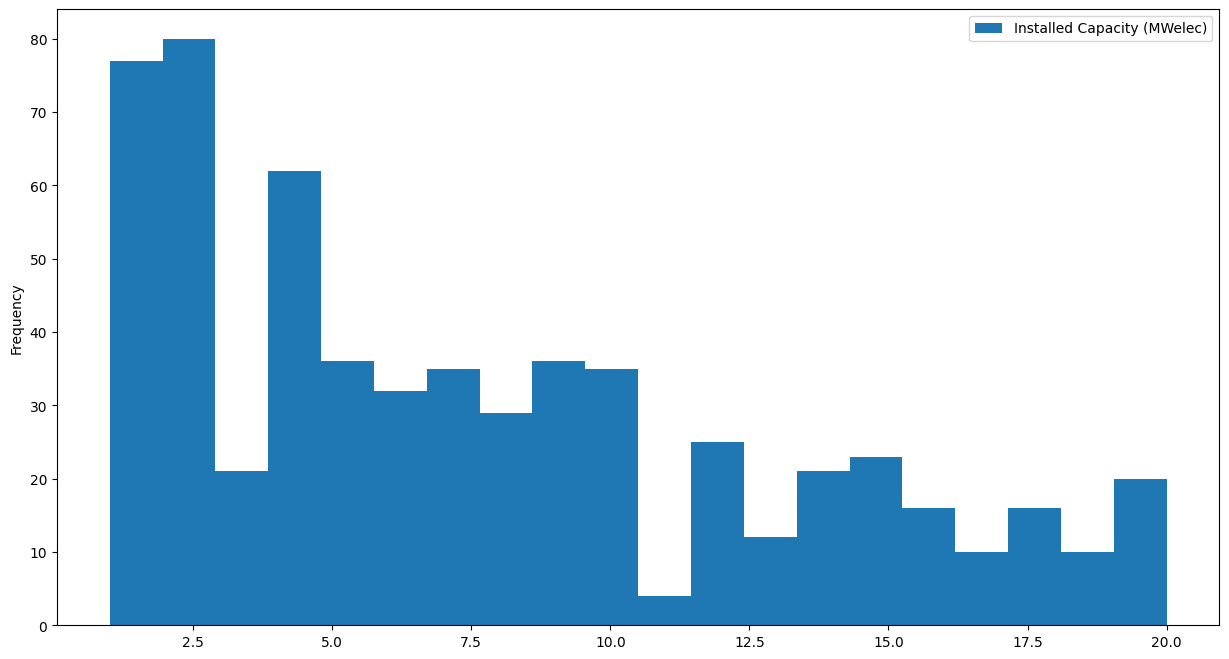

In [32]:
# narrow to lower range

os_wind.plot(kind = 'hist', range=[1, 20], bins =20, figsize=(15,8))
plt.show()

## again large number of installations with small numbers of turbines

## Are there any particular groups of operators/applicants worth reviewing further?
Looking to see if any companies stand out in terms of renewable investment.  


In [33]:
repd.head()

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref,long,lat
0,N00053B,1,2009-07-07,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,2004-09-03,NaT,NaT,NaT,NaT,2006-05-01,2007-05-01,NaN,0.503096,NaN
2,B0730,3,2020-06-04,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,2015-10-28,NaT,NaT,NaT,2020-10-28,2016-09-01,2019-12-20,NaN,0.759256,NaN
3,1106000,4,2003-12-18,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,1995-05-05,NaT,NaT,NaT,NaT,NaT,1998-10-02,NaN,0.455758,NaN
13,A0331,14,2012-04-04,Dalkia,Chilton Energy Plant,Biomass (dedicated),NaN,NaN,18.0,No,...,2009-11-24,NaT,NaT,NaT,NaT,2010-03-01,2012-03-12,NaN,0.891796,NaN
16,AA851,22,2012-08-10,Double H Nurseries,Double H Nurseries Biomass Plant,Biomass (dedicated),NaN,NaN,1.5,Yes,...,2012-05-29,NaT,NaT,NaT,NaT,NaT,2012-12-15,NaN,0.220175,NaN


In [34]:
operators =  repd[['Operator (or Applicant)','Technology Type', 'Installed Capacity (MWelec)','CfD Capacity (MW)', 'RO Banding (ROC/MWh)' ]]

In [35]:
operators.value_counts('Operator (or Applicant)').head(30)

Operator (or Applicant)
Lightsource Renewable Energy          122
Scottish and Southern Energy (SSE)     55
Anesco                                 46
Waste Recycling Group                  45
WM Morrisons Supermarkets Plc          41
Scottish Power Renewables              32
Biffa                                  29
Renewable Energy Systems (RES)         29
Foresight                              23
RWE npower                             23
British Solar Renewables               22
Lark Energy                            21
Push Energy                            20
Viridor                                20
SITA UK                                19
EDF Energy Renewables                  19
Green Cat Renewables                   18
Lightsource BP                         18
Wessex Solar Energy                    17
Natural Power                          17
Ecotricity                             17
Elgin Energy EsCo                      16
E.ON UK                                15
Hive Energ

Lightsource is a BP company  https://lightsourcebp.com/uk/ 


#### Look at those that are approved for CfD as these may be better options for investment.

Contracts for difference (CfDs) incentivise investment in renewable energy by providing developers of projects with high upfront costs and long lifetimes with direct protection from volatile wholesale prices, and they protect consumers from paying increased support costs when electricity prices are high. This scheme replaces RO and FiT.

In [36]:
 # remove CfD Nan

cfd = operators.dropna(subset=['CfD Capacity (MW)'], inplace = False)

In [37]:
cfd.shape

(125, 5)

In [38]:
cfd.value_counts('Operator (or Applicant)').head(20)

Operator (or Applicant)
BayWa r.e. UK Limited                                6
Scottish Power Renewables                            6
Lightsource BP                                       5
Orsted (formerly Dong Energy)                        5
Elgin Energy                                         4
Moray East (formerly MORL)/ EDPR                     3
Banks Renewables                                     3
Anesco Limited                                       3
Intelligent Alternatives                             2
Enso Energy Limited                                  2
SSE/Equinor (formerly Statoil, formerly Forewind)    2
Innogy                                               2
Innova Renewables Limited                            2
JBM Solar Projects Limited                           2
Vantage RE                                           2
Low Carbon                                           2
British Solar Renewables / BayWa r.e. UK Limited     2
Voltalia UK                              

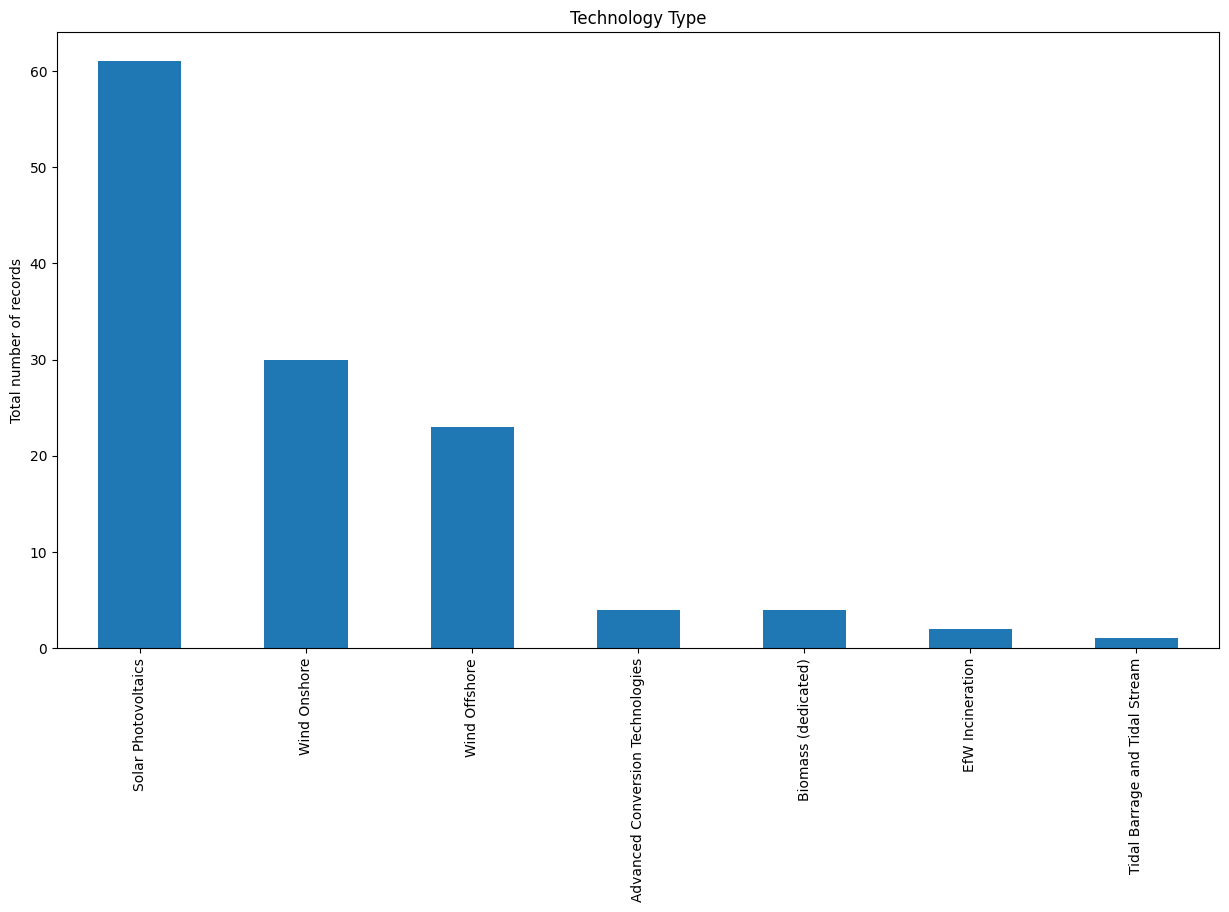

In [39]:
# plot most common technologies that include CfD.

cfd.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type')
plt.xticks(rotation = 90)
plt.ylabel('Total number of records')
plt.xlabel('')
plt.show()

Identify which areas have most and least approved installations

In [60]:
planning = repd['Planning Authority'].value_counts() 
print(planning.head(10),'\n')
print(planning.tail(30))

Scottish Government (S36)            151
Northern Ireland Planning Service    145
Cornwall Council                     126
Highland Council                     117
Aberdeenshire Council                 89
Wiltshire Council                     73
DECC (S36)                            52
East Riding of Yorkshire Council      51
Durham County Council                 46
Fife Council                          41
Name: Planning Authority, dtype: int64 

East Ayrshire council                  1
Warwick District council               1
Mansfield district Council             1
London Borough of Newham               1
Stockton-on-Tees Borough Council       1
Oldham Metropolitan Borough Council    1
London Borough of Barnet               1
Gateshead council                      1
Southend-on-Sea Borough Council        1
Brent London Borough of                1
City of Westminster Council            1
Reading Borough Council                1
Cornwall County Council                1
London Borough o

In [57]:
county = repd['County'].value_counts() 
print(county.head(10), '\n')
print(county.tail(25))

Highland          153
Strathclyde       146
Devon             146
Cornwall          128
Cambridgeshire    112
Essex             111
Hampshire         106
Somerset          103
Wiltshire         101
Kent               98
Name: County, dtype: int64 

Leicestershire                   2
Kent                             2
Wigtownshire                     2
Cornwall                         1
North Yorkshire                  1
East Derbyshire                  1
East Riding Of Yorkshire         1
Stirlingshire                    1
West Yorkshire                   1
East Yorkshire                   1
Yorkshire                        1
Isle of Man                      1
Inverclyde                       1
Lanarkshire                      1
Cheshire                         1
West Berkshire                   1
Shropshire                       1
Lancashire                       1
South Derbyshire                 1
Berkshire                        1
Herefordshire                    1
Northumberland  